<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Ranidu-Gurusinghe/ARIMA_and_Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [353]:
from google.colab import drive
import pandas as pd


##Loading Data

In [352]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the preprocessed data from Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/preprocessed_data_new.xlsx'
data = pd.read_excel(file_path)

# Display the loaded data
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Date    Shift   Code          Department Absenteeism Type    Status  \
0 2021-12-01  Shift A  AA369  Team - MAT 4A - BD         Informed  Notified   
1 2021-12-01  Shift A  AA362  Team - MAT 4A - BD         Informed  Notified   
2 2021-12-01  Shift A  AA359  Team - MAT 4A - BD         Informed  Notified   
3 2021-12-01  Shift A  AA541  Team - MAT 4A - BD         Informed  Notified   
4 2021-12-01  Shift A  AA398  Team - MAT 3A - BD         Informed  Notified   

   Leave Type Absent/Present     Reason Joined Date  ...  LeaveMonth  \
0           1            MAT  Maternity  2015-09-11  ...          12   
1           1            MAT  Maternity  2018-11-14  ...          12   
2           1            MAT  Maternity  2019-10-09  ...          12   
3           1            MAT  Maternity  2020-10-02  ...          12   
4           1            MAT  Matern

In [354]:
unique_employee_codes = data['Code'].unique()
print(unique_employee_codes)

['AA369' 'AA362' 'AA359' ... 'AA2313' 'AA3449' 'AA4244']


In [355]:
leave_days_AA369 = data[data['Code'] == 'AA359'][['LeaveYear','LeaveMonth']]
print(leave_days_AA369)


       LeaveYear  LeaveMonth
2           2021          12
403         2021          12
933         2021          12
1700        2021          12
1814        2021          12
1820        2021          12
3020        2021          12
3192        2022           1
3723        2022           1
4206        2022           1
12343       2022           5
12344       2022           5
13962       2022           5
13963       2022           5
14335       2022           5
14717       2022           5
15063       2022           5
15631       2022           6
15632       2022           6
16946       2022           6
18059       2022           6
18232       2022           7
18644       2022           7
18856       2022           7
19054       2022           7
19438       2022           7
19893       2022           8
24992       2022          11
39016       2023          11
39027       2023          11


In [356]:
leave_days_by_month = data.groupby(['LeaveYear', 'LeaveMonth']).size().reset_index(name='TotalLeaveDays')
print(leave_days_by_month)
ts_data = leave_days_by_month['TotalLeaveDays']

    LeaveYear  LeaveMonth  TotalLeaveDays
0        2021          12            3184
1        2022           1            2181
2        2022           2            2353
3        2022           3            2471
4        2022           4            1770
5        2022           5            3351
6        2022           6            2834
7        2022           7            1580
8        2022           8            1724
9        2022           9            1575
10       2022          10            1905
11       2022          11            1664
12       2022          12            1155
13       2023           1            1104
14       2023           2             412
15       2023           3            1264
16       2023           4             469
17       2023           5            1758
18       2023           6            1260
19       2023           7            1098
20       2023           8            1082
21       2023           9            1030
22       2023          10         

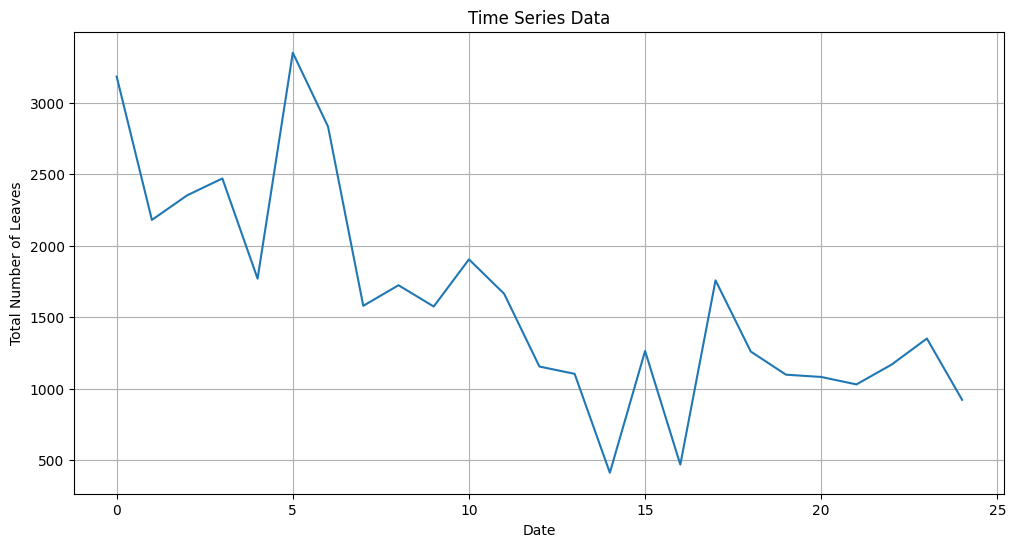

ADF Statistic: -0.9336382039217688
p-value: 0.7766931768801943
Critical Values:
   1%: -3.8092091249999998
   5%: -3.0216450000000004
   10%: -2.6507125


In [357]:
import pandas as pd
import matplotlib.pyplot as plt


# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(ts_data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Total Number of Leaves')
plt.grid(True)
plt.show()

# Perform statistical tests for stationarity
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

adf_test(ts_data)



time series data is non-stationary, indicating the presence of trends or seasonality

##Developing ARIMA Model

20    1345.249929
21     894.856740
22    1321.424693
23    1194.472169
24    1153.867391
Name: predicted_mean, dtype: float64
Mean Squared Error: 37812.192346177544
Root Mean Squared Error (RMSE): 194.45357375522195


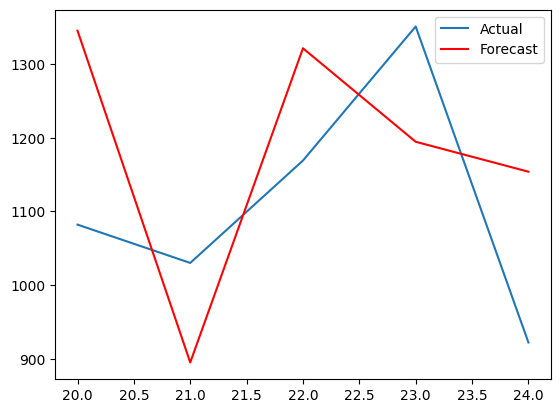

In [358]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 3: Split Data
train_size = int(len(ts_data) * 0.8)
train_data, test_data = ts_data[:train_size], ts_data[train_size:]

# Step 4: Build and Train ARIMA Model
order = (4, 1, 0)  # Example ARIMA parameters (p, d, q)
model = ARIMA(train_data, order=order)
trained_model = model.fit()

# Step 5: Validate Model
forecast = trained_model.forecast(steps=len(test_data))
print(forecast)
# Step 6: Evaluate Model
mse = mean_squared_error(test_data, forecast)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize Results
plt.plot(test_data, label='Actual')
plt.plot(forecast, color='red', label='Forecast')
plt.legend()
plt.show()


##Developing Random Forest Classifier

In [359]:
# Define a dictionary mapping each (year, month) tuple to its corresponding total leave count
# for year in data['LeaveYear']:
#   for month in data['LeaveMonth']:
#     for monthlytot in ts_data:
#       monthly_totals = (year, month), monthlytot
monthly_totals = {
    (2021, 12): 3184,
    (2022, 1): 2181,
    (2022, 2): 2353,
    (2022, 3): 2471,
    (2022, 4): 1770,
    (2022, 5): 3351,
    (2022, 6): 2834,
    (2022, 7): 1580,
    (2022, 8): 1724,
    (2022, 9): 1575,
    (2022, 10): 1905,
    (2022, 11): 1664,
    (2022, 12): 1155,
    (2023, 1): 1104,
    (2023, 2): 412,
    (2023, 3): 1264,
    (2023, 4): 469,
    (2023, 5): 1758,
    (2023, 6): 1260,
    (2023, 7): 1098,
    (2023, 8): 1082,
    (2023, 9): 1030,
    (2023, 10): 1169,
    (2023, 11): 1351
}
forecast={
    (2023, 7): 1323,
    (2023, 8): 865,
    (2023, 9): 1295,
    (2023, 10): 1187
}

# Create a new column 'MonthlyTotal' by mapping the (year, month) tuple to its corresponding total leave count
data['MonthlyTotal'] = data.apply(lambda row: monthly_totals.get((row['LeaveYear'], row['LeaveMonth']), 0), axis=1)

# Display the updated DataFrame
print(data)


            Date    Shift    Code                    Department  \
0     2021-12-01  Shift A   AA369            Team - MAT 4A - BD   
1     2021-12-01  Shift A   AA362            Team - MAT 4A - BD   
2     2021-12-01  Shift A   AA359            Team - MAT 4A - BD   
3     2021-12-01  Shift A   AA541            Team - MAT 4A - BD   
4     2021-12-01  Shift A   AA398            Team - MAT 3A - BD   
...          ...      ...     ...                           ...   
40661 2023-12-22  Shift A  AA2212  Sewing Team - 145A - II - BD   
40662 2023-12-22  Shift A   AA723   Sewing Team - 109A - I - BD   
40663 2023-12-22  Shift A  AA1280   Sewing Team - 152A - I - BD   
40664 2023-12-22  Shift A  AA1964   Sewing Team - 135A - I - BD   
40665 2023-12-22  Shift A    AA12   Sewing Team - 153A - I - BD   

      Absenteeism Type    Status  Leave Type Absent/Present           Reason  \
0             Informed  Notified           1            MAT        Maternity   
1             Informed  Notified   

In [360]:
def onehot_encode(df, column, prefix):
    df = df.copy()

    dummies = pd.get_dummies(df[column], prefix=prefix)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)

    return df

In [361]:
from sklearn.model_selection import train_test_split
def preprocess_inputs(df):
    df = df.copy()

    # Drop ID columns

    df = df.drop('Code', axis=1)
    df = df.drop('Shift', axis=1)
    df = df.drop('Department', axis=1)
    df = df.drop('Absenteeism Type', axis=1)
    df = df.drop('Status', axis=1)
    df = df.drop('Leave Type', axis=1)
    df = df.drop('Absent/Present', axis=1)
    df = df.drop('Reason', axis=1)
    df = df.drop('Joined Date', axis=1)
    df = df.drop('LeavesNextMonth', axis=1)
    df = df.drop('TookLeaveNextMonth', axis=1)
    # One-hot encode the reason column
    df = onehot_encode(
        df,
        column='Encoded Reason',
        prefix='Reason'
    )

    # Filter the data for November 2023
    testing_data_november = df[(df['LeaveYear'] == 2023) & (df['LeaveMonth'] >= 11)]
    print("Nov", testing_data_november.shape)
    df = df[df['Date'] < '2023-11-01']
    testing_data_october = df[(df['LeaveYear'] == 2023) & (df['LeaveMonth'] >= 10)]
    print("Oct", testing_data_october.shape)
    df = df[df['Date'] < '2023-10-01']
    testing_data_september = df[(df['LeaveYear'] == 2023) & (df['LeaveMonth'] >= 9)]
    print("Sept", testing_data_september.shape)



    testing_data = df[df['Date'] > '2023-09-01']
    df = df[df['Date'] < '2023-10-01']
    df = df.drop('Date', axis=1)
    testing_data = testing_data.drop('Date', axis=1)
    testing_data_october_copy = testing_data_october.copy()
    testing_data_october_copy = testing_data_october_copy.drop('Date', axis=1)



    # Split df into X and y
    Y_train = df['TargetCategory'].copy()
    X_train = df.drop('TargetCategory', axis=1)
    X_test = testing_data_october_copy.drop('TargetCategory', axis=1)
    Y_test = testing_data_october_copy['TargetCategory'].copy()

    X_test['MonthlyTotal'] = data.apply(lambda row: forecast.get((row['LeaveYear'], row['LeaveMonth']), 0), axis=1)

    return testing_data_september, testing_data_october, testing_data_november, X_train, X_test, Y_train, Y_test

In [362]:
# Split the remaining data into training and testing sets
testing_data_september, testing_data_october, testing_data_november, X_train, X_test, y_train, y_test = preprocess_inputs(data)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_test)
testing_data_september.to_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/testing_data_september.xlsx', index=False)
testing_data_october.to_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/testing_data_october.xlsx', index=False)
testing_data_november.to_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/testing_data_november.xlsx', index=False)

Nov (2273, 31)
Oct (1169, 31)
Sept (1030, 31)
(37224, 29)
(37224,)
(1169, 29)
(1169,)
       DaysWorked  DayOfWeek  Encoded Code  LeaveMonth  Encoded Status  \
37190       10146          1           717          10               1   
37191        7831          1          3420          10               1   
37192       10016          1          1585          10               1   
37193        7780          1          3155          10               1   
37194        9947          1          1374          10               1   
...           ...        ...           ...         ...             ...   
39175        2718          5          1506          10               1   
39176         968          5           275          10               1   
39177         738          5          2989          10               1   
39178        3326          5           860          10               1   
39179        1094          5           853          10               1   

       Encoded Absenteeis

In [363]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate SMOTE
smote = SMOTE(random_state=123)

# Apply SMOTE to your training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(X_train_resampled.shape)

(49570, 29)


In [364]:
from sklearn. ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=40,random_state=123)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=40, n_estimators=500, random_state=123)

In [365]:
from sklearn.metrics import accuracy_score


predictions_rf = rf_model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_rf})
accuracy = accuracy_score(y_test, predictions_rf)


print("Actual values and predictions:")
print(results_df)
print("\n\nAccuracy of Predicted Classes:", accuracy)


Actual values and predictions:
      Actual Predicted
37190      A         A
37191      A         A
37192      A         A
37193      A         A
37194      A         A
...      ...       ...
39175      A         A
39176      A         A
39177      A         A
39178      B         A
39179      A         A

[1169 rows x 2 columns]


Accuracy of Predicted Classes: 0.8306244653550042


In [366]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(y_test, predictions_rf)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.84      0.95      0.89       849
           B       0.79      0.52      0.62       320

    accuracy                           0.83      1169
   macro avg       0.82      0.73      0.76      1169
weighted avg       0.83      0.83      0.82      1169



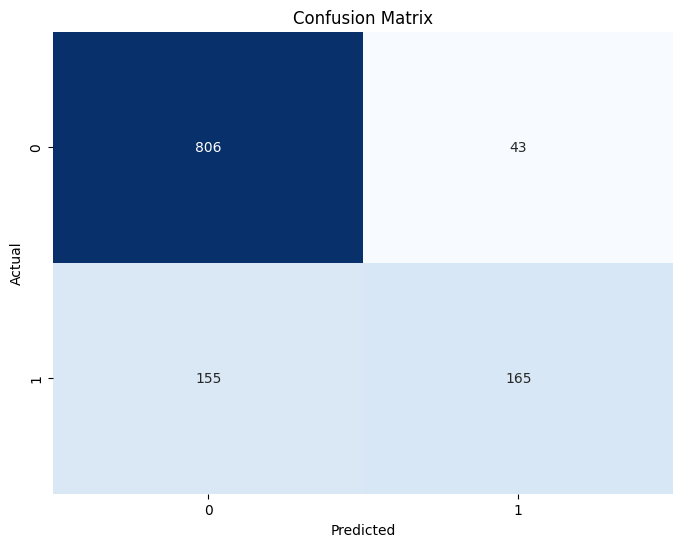

In [367]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, predictions_rf)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [368]:
# Get the predicted probabilities for each class
predicted_probabilities = rf_model.predict_proba(X_test)

# Get the index of class B
class_b_index = list(rf_model.classes_).index('B')

# Extract the probabilities for class B
class_b_probabilities = predicted_probabilities[:, class_b_index]

# Assuming the confidence level is the probability of class B
confidence_level_b = class_b_probabilities

# Get the predicted class
predicted_class = rf_model.predict(X_test)

# Iterate over each prediction in class B
for i, (actual, predicted, probability) in enumerate(zip(y_test, predicted_class, confidence_level_b)):
    if predicted == 'B':
        print(f"Actual: {actual}, Predicted: {predicted}, Probability: {probability}")


Actual: B, Predicted: B, Probability: 0.664
Actual: A, Predicted: B, Probability: 0.86
Actual: B, Predicted: B, Probability: 0.838
Actual: A, Predicted: B, Probability: 0.582
Actual: B, Predicted: B, Probability: 0.916
Actual: B, Predicted: B, Probability: 0.928
Actual: B, Predicted: B, Probability: 0.94
Actual: B, Predicted: B, Probability: 0.93
Actual: B, Predicted: B, Probability: 0.948
Actual: B, Predicted: B, Probability: 0.854
Actual: B, Predicted: B, Probability: 0.882
Actual: B, Predicted: B, Probability: 0.694
Actual: A, Predicted: B, Probability: 0.688
Actual: B, Predicted: B, Probability: 0.964
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.942
Actual: B, Predicted: B, Probability: 0.59
Actual: A, Predicted: B, Probability: 0.568
Actual: A, Predicted: B, Probability: 0.716
Actual: B, Predicted: B, Probability: 0.928
Actual: B, Predicted: B, Probability: 0.728
Actual: B, Predicted: B, Probability: 0.784
Actual: B, Predicted: B, Probability

In [369]:
# Filter predictions with probability > 0.9
high_confidence_predictions = [(actual, predicted, probability) for actual, predicted, probability in zip(y_test, predicted_class, confidence_level_b) if probability > 0.9]

# Display filtered predictions
for actual, predicted, probability in high_confidence_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}, Probability: {probability}")

Actual: B, Predicted: B, Probability: 0.916
Actual: B, Predicted: B, Probability: 0.928
Actual: B, Predicted: B, Probability: 0.94
Actual: B, Predicted: B, Probability: 0.93
Actual: B, Predicted: B, Probability: 0.948
Actual: B, Predicted: B, Probability: 0.964
Actual: B, Predicted: B, Probability: 0.924
Actual: B, Predicted: B, Probability: 0.942
Actual: B, Predicted: B, Probability: 0.928
Actual: B, Predicted: B, Probability: 0.956
Actual: B, Predicted: B, Probability: 0.932
Actual: B, Predicted: B, Probability: 0.97
Actual: B, Predicted: B, Probability: 0.97
Actual: B, Predicted: B, Probability: 0.962
Actual: B, Predicted: B, Probability: 0.958
Actual: B, Predicted: B, Probability: 0.974
Actual: B, Predicted: B, Probability: 0.968
Actual: B, Predicted: B, Probability: 0.94
Actual: B, Predicted: B, Probability: 0.904
Actual: B, Predicted: B, Probability: 0.926
Actual: B, Predicted: B, Probability: 0.922
Actual: B, Predicted: B, Probability: 0.932
Actual: B, Predicted: B, Probability:

In [370]:
# Filter predictions with probability > 0.9 and predicted as category B
high_confidence_category_b = [X_test.iloc[i]['Encoded Code'] for i, (_, predicted, probability) in enumerate(zip(y_test, predicted_class, confidence_level_b)) if predicted == 'B' and probability > 0.9]

# Display encoded codes of employees predicted to be in category B with >0.9 probability
print("Encoded codes of employees predicted to be in category B with >0.9 probability:")
for encoded_code in high_confidence_category_b:
    print(encoded_code)


Encoded codes of employees predicted to be in category B with >0.9 probability:
4102
1316
1666
1965
1752
3308
3984
4098
4096
4096
243
2306
2766
1072
320
4042
4036
3895
1752
3308
3308
4096
2306
2031
2766
1072
4042
4036
4032
1442
1316
1666
1752
4098
